In [5]:
import httplib2
import json
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import numpy as np
import pandas as pd
from datetime import datetime

def convertToDate(s): 
    return datetime.strptime(str(s), '%Y%m%d')

countrySummary = 'https://covidtracking.com/api/us/daily'
statesCurrent = 'https://covidtracking.com/api/states/daily'
h = httplib2.Http('.cache')

# Get data
(response,stateDataRaw) = h.request(statesCurrent,'GET')
stateDataDf = pd.DataFrame(json.loads(stateDataRaw.decode('UTF-8')))

(response,countryRaw) = h.request(countrySummary,'GET')
countryDf = pd.DataFrame(json.loads(countryRaw.decode('UTF-8')))



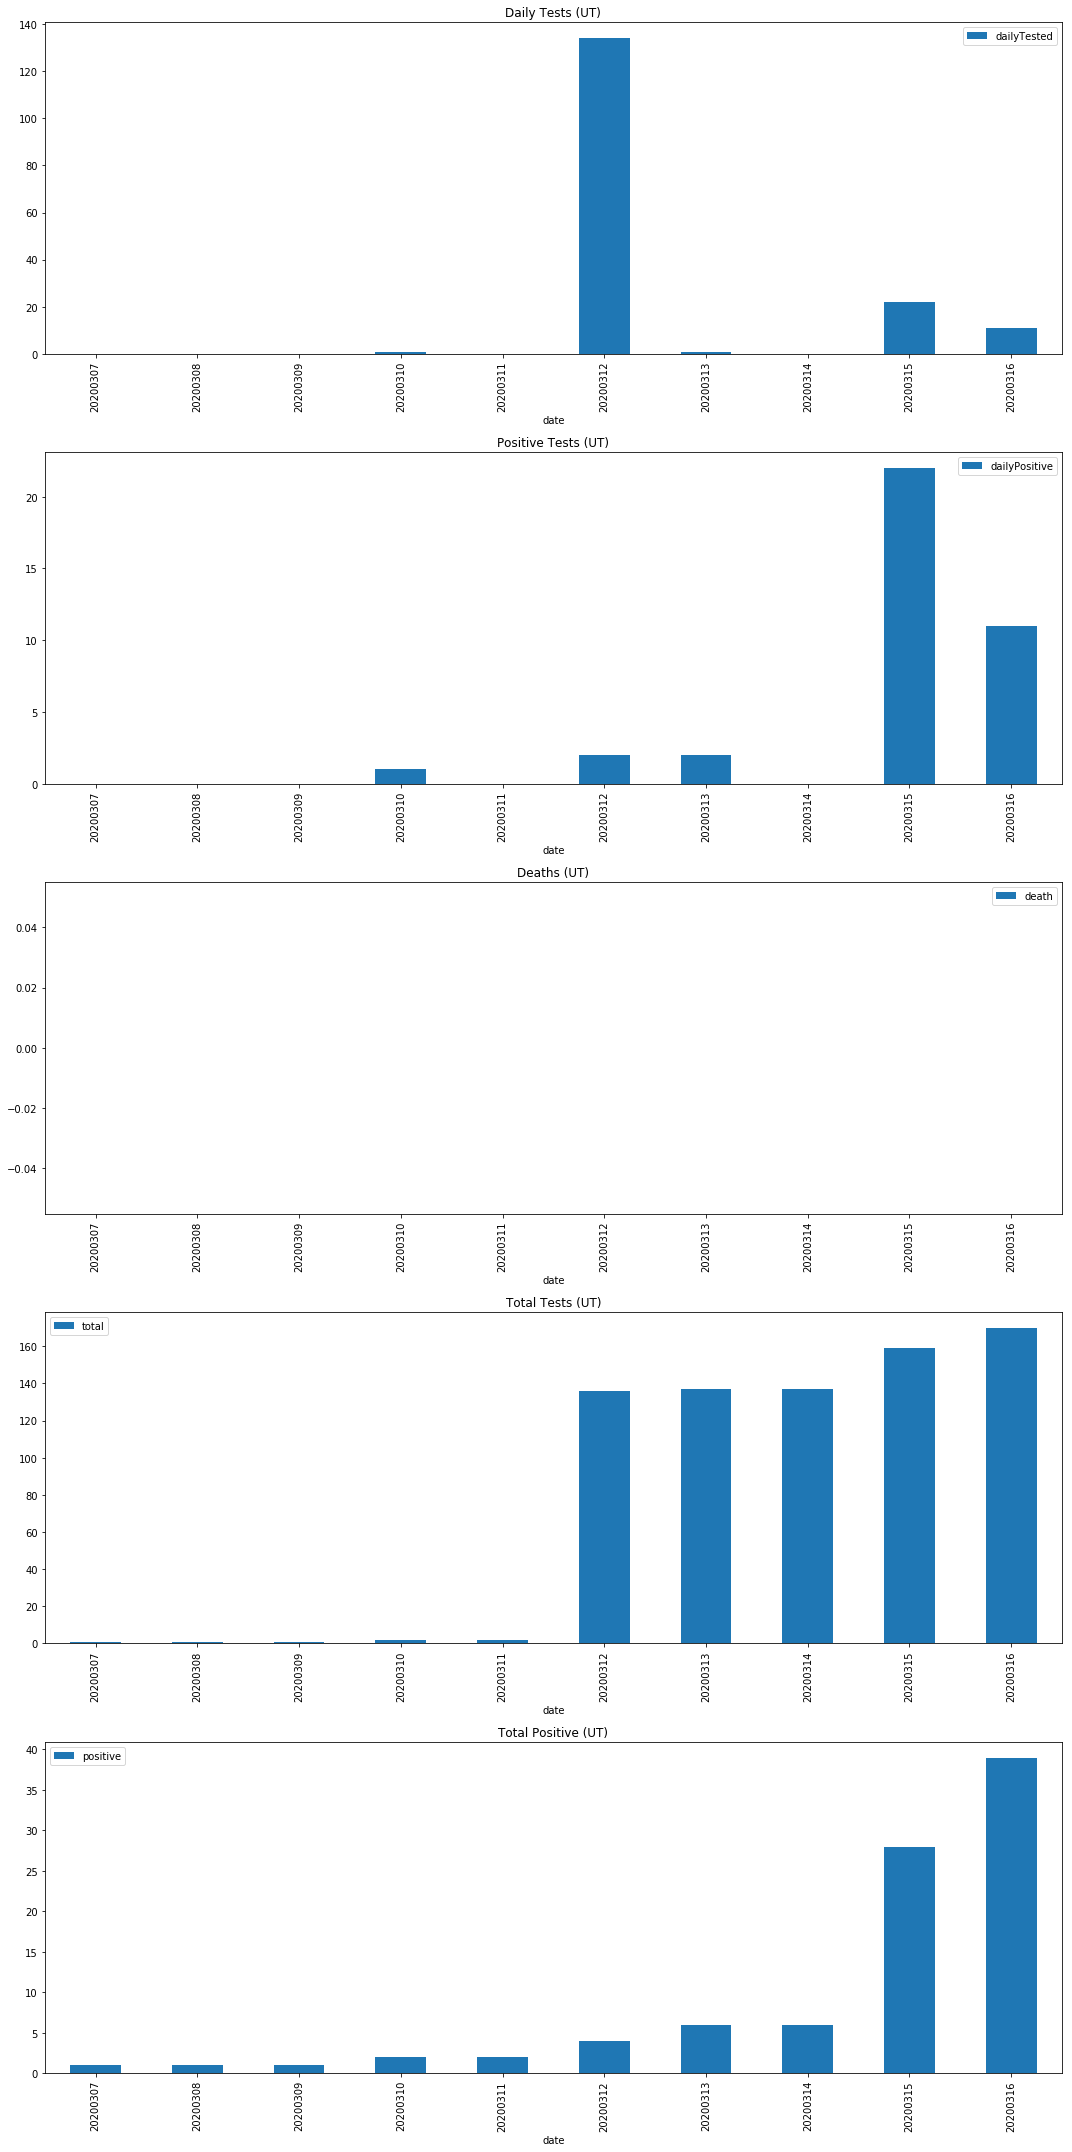

In [27]:
# Create figure/axes
stateFig, (utahDailyTested,utahDailyPositive,utahTotalDeaths,utahTotalTests,utahTotalPositive) = plt.subplots(nrows=5,ncols=1,figsize=(15,30))

utahDataDf = stateDataDf[stateDataDf['state']=='UT'].sort_values(by=['date'])
utahDataDf['pctChangeTested'] = utahDataDf['total'].pct_change(fill_method='pad')
utahDataDf['pctChangeDeaths'] = utahDataDf['death'].pct_change(fill_method='pad')
utahDataDf['dailyTested'] = utahDataDf['total'].diff()
utahDataDf['dailyPositive'] = utahDataDf['positive'].diff()

# Draw Utah data
utahDailyTested.set_title('Daily Tests (UT)')
utahDailyPositive.set_title('Positive Tests (UT)')
utahTotalDeaths.set_title('Deaths (UT)')
utahTotalTests.set_title('Total Tests (UT)')
utahTotalPositive.set_title('Total Positive (UT)')

utahDataDf[['date', 'dailyTested']].plot.bar(ax=utahDailyTested,x='date')
utahDataDf[['date', 'dailyPositive']].plot.bar(ax=utahDailyPositive,x='date')
utahDataDf[['date', 'death']].plot.bar(ax=utahTotalDeaths,x='date')
utahDataDf[['date', 'total']].plot.bar(ax=utahTotalTests,x='date')
utahDataDf[['date', 'positive']].plot.bar(ax=utahTotalPositive,x='date')
stateFig.tight_layout()

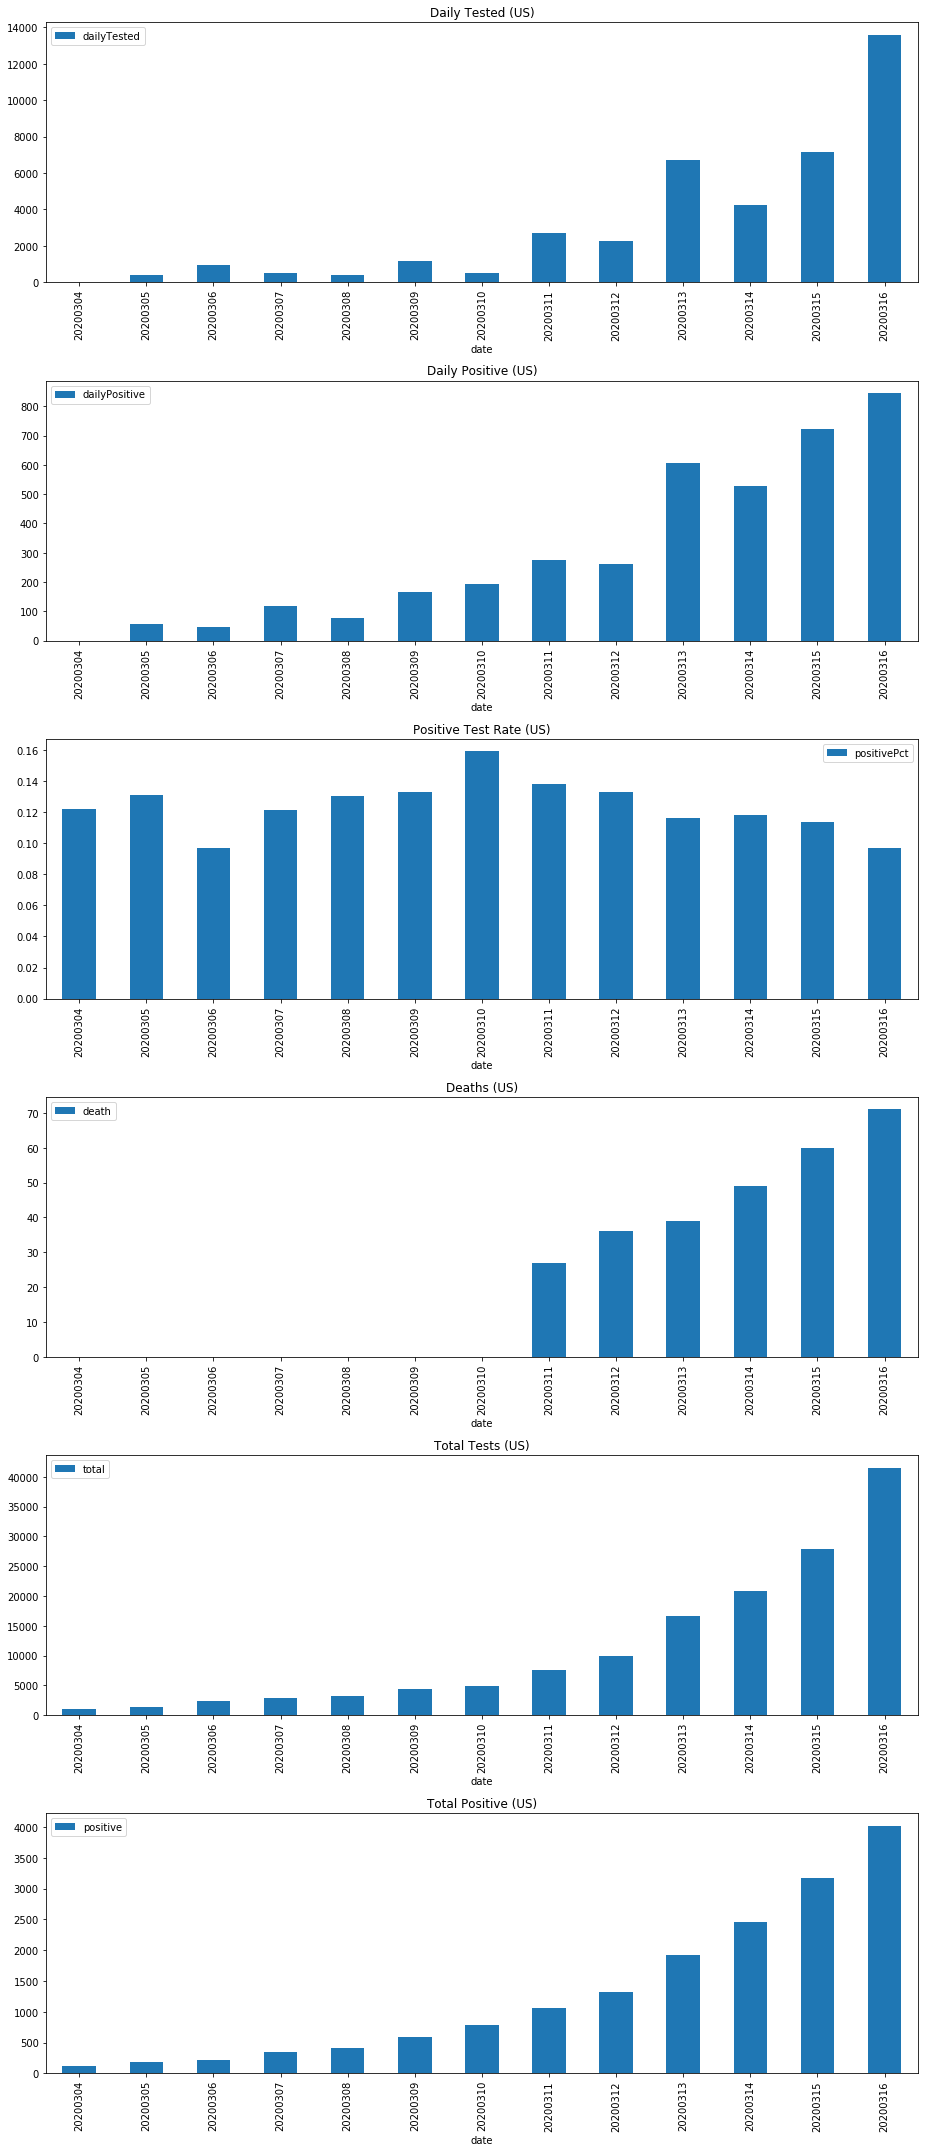

In [23]:
# Create figure/axes
countryFig, (usDailyTested,usDailyPositive,usPositivePct,usDeaths,usTotalTests,usTotalPositive) = plt.subplots(nrows=6,ncols=1,figsize=(13,30))

# Get US data       
countryDf['pctChangeTested'] = countryDf['total'].pct_change(fill_method='pad')
countryDf['dailyTested'] = countryDf['total'].diff()
countryDf['dailyPositive'] = countryDf['positive'].diff()
countryDf['pctChangeDeaths'] = countryDf['death'].pct_change(fill_method='pad')
countryDf['presumptivePositives'] = countryDf['death'].apply(lambda d:  d/.02)
countryDf['positivePct'] = countryDf.apply(lambda o: o['positive']/o['total'], axis=1)

# Draw country data
usDailyTested.set_title('Daily Tested (US)')
usDailyPositive.set_title('Daily Positive (US)')
usPositivePct.set_title('Positive Test Rate (US)')
usDeaths.set_title('Deaths (US)')
usTotalTests.set_title('Total Tests (US)')
usTotalPositive.set_title('Total Positive (US)')

countryDf[['date', 'dailyTested']].plot.bar(ax=usDailyTested,x='date')
countryDf[['date', 'dailyPositive']].plot.bar(ax=usDailyPositive,x='date')
countryDf[['date', 'positivePct']].plot.bar(ax=usPositivePct,x='date')
countryDf[['date', 'death']].plot.bar(ax=usDeaths,x='date')
countryDf[['date', 'total']].plot.bar(ax=usTotalTests,x='date')
countryDf[['date', 'positive']].plot.bar(ax=usTotalPositive,x='date')
#countryDf[['date','pctChangeTested','pctChangeDeaths']].plot.bar(ax=percAx,x='date')                   

countryFig.tight_layout()
